In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # statsmodels  

In [2]:
df =  pd.read_csv("/AirPassengers.csv", index_col=0)
df.head()


,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [7]:
df.index.min()

'1949-01'

In [6]:
df.index.max()

'1960-12'

In [4]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [8]:
df.shape

(144, 1)

In [10]:
df.index = pd.to_datetime(df.index)  #### This is very imp - >>> Date or Datetime as index -- convert that into proper datetime


# pd.to_datetime

In [11]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [13]:
df.columns = ['Passengers']
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# Date component should be in the index of the dataframe
# The index should be in pandas date-time format

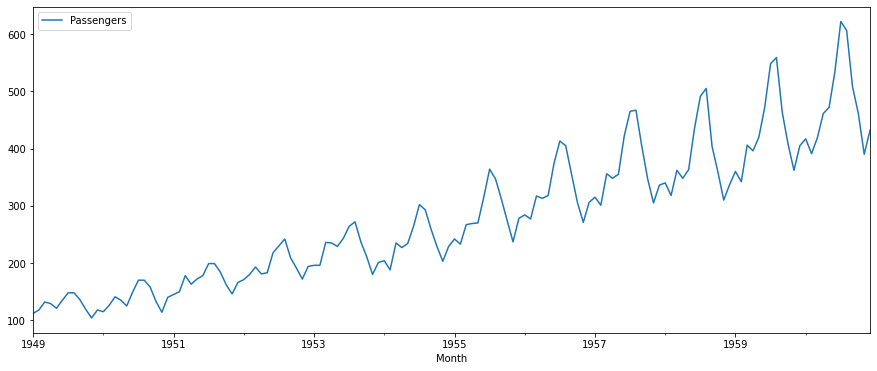

In [14]:
df.plot(figsize = (15,6))

In [ ]:
# Decompostion of time series 


# Trend , Seasonality etc. 


## Will you have do it by writing your own function - NO 


# sm.tsa.seasonal_decompose
#df


# Residuals 


# Actual Predicted 

# Residuals or error - Acutal - Predicted

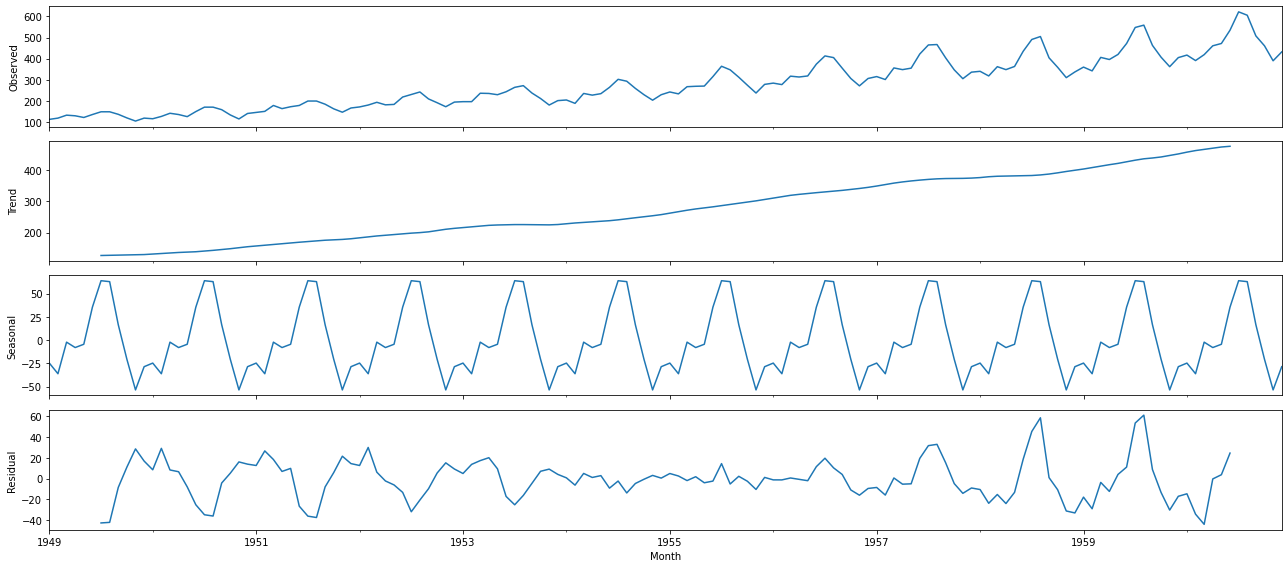

In [15]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "additive")
fig = decomposition.plot()

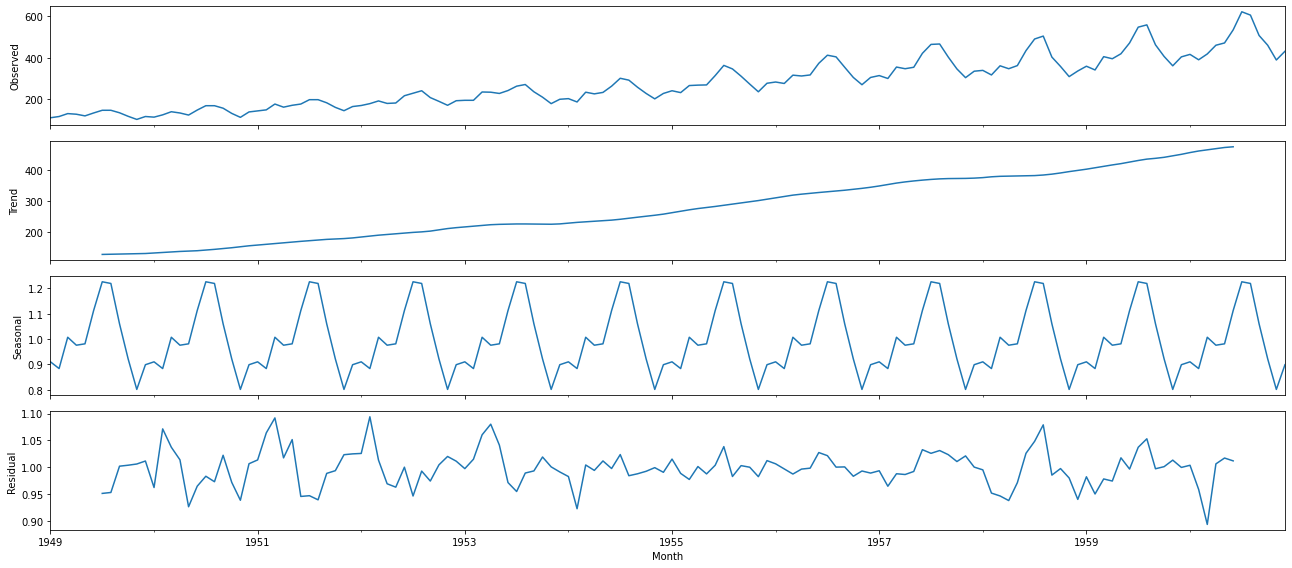

In [16]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "multiplicative")
fig = decomposition.plot()

## Simple Moving Average Model

In [17]:
df.head(n=20)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
## Window Funcntion in pandas 

In [18]:
df_ma = df.copy()

# windows function 

# rolling 


df_ma['SMA_12'] = df_ma.rolling(window = 12).mean()
df_ma.head(20)

,Passengers,SMA_12
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


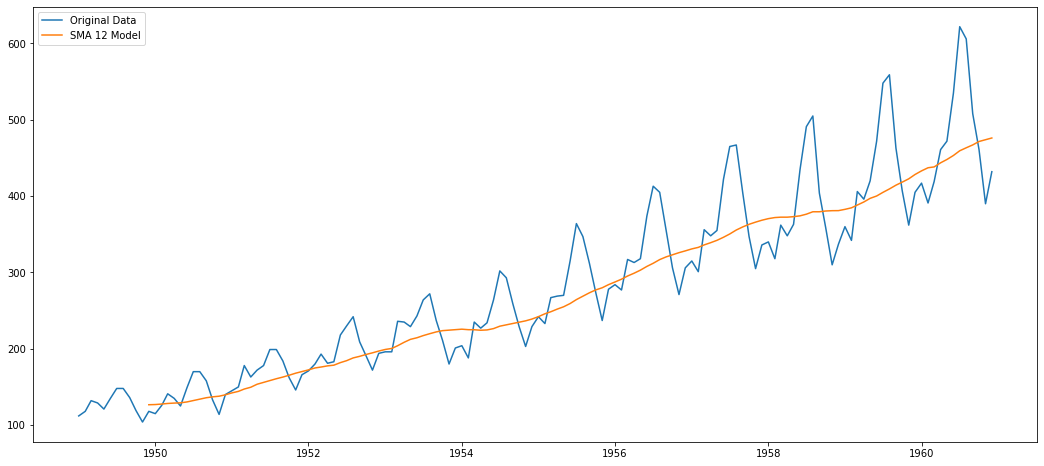

In [19]:
plt.plot(df_ma['Passengers'], label = 'Original Data')
plt.plot(df_ma['SMA_12'], label = "SMA 12 Model")
plt.legend()

In [20]:
## Acutual - Predicted 


# mape - Mean absolute percentage error 


#Mean(AbS(( A - P) A )*100




def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)) *100



In [21]:
mape(df_ma['Passengers'], df_ma['SMA_12'])

10.778519137583197

## Stationarity Check using ADF TEST

In [ ]:
# NULL HYPOTHESIS - Time Series is not stationary

# Alternate Hypthesis  - Time Series is  stationary


# p value > 0.05 --- >> yu fail to reject null hypeothesis 

In [23]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df)

print("p-value % 0.04f" % adf_test[1])

ValueError: ignored

- Null: Time Series is not stationary
- Alternate: Time Series is Stationary

Faile to reject Null. Conclude that my time series is not stationary

In [ ]:
df.head()

In [ ]:
# Timeseries is NON Stanionary 


#  I convert this to stantionary --- >>>>>> detrending , transformations maths , etc.

In [ ]:
df.head()

In [ ]:
62.6166 - 70.8479 


In [ ]:
# Let's a one order differencing


df_1 =     df.diff()

df_1.head()

# df  - df_1 by doing one order difference - in hope that this will make my TS stationary 

In [ ]:
df_1.dropna(inplace=True)

In [ ]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df_1)

print("p-value % 0.04f" % adf_test[1])

In [ ]:
df.plot()

In [ ]:
df_1.plot()